### Задание 1

Выберите один верный ответ. “Коэффициент корреляции между количеством сна и уровнем счастья равен нулю” - это...

* 1) Нулевая гипотеза
* 2) Альтернативная гипотеза

Ответ: 1) Нулевая гипотеза

### Задание 2

Выберите один верный ответ. Если уровень значимости 0.10, а p-значение равно 0.7, то необходимо...

* 1)отвергнуть нулевую гипотезу
* 2)не отвергать нулевую гипотезу


Ответ: 2) не отвергать нулевую гипотезу

### Задание 3

Выберите все подходящие ответы. Что из перечисленного является 
статистической гипотезой?

* 1)  Случайная величина X имеет 
     нормальное распределение
* 2)  Среднее арифметическое 
     признака A равно 52.5
* 3)  Средний вес упаковки яблок составляет 1300 г.
* 4)  Дисперсия случайной величины X 
     не больше 5

Все ответы. 1,2,3,4

### Задание 4

Парфюмерная компания хочет узнать возраст женщин, которые являются их покупательницами. Ранее уже было изучено, что средний возраст  был 37, а среднеквадратичное отклонение равно 3.4. Размер выборки - 200 человек. Рассчитайте 95% доверительный интервал для среднего возраста. Представьте все необходимые вычисления.

In [1]:
d1 = 37 - (1.96*3.4/(200**(1/2)))
d2 = 37 + (1.96*3.4/(200**(1/2)))
print('95% доверительный интервал для среднего возраста:\n',round(d1,2),round(d2,2))

95% доверительный интервал для среднего возраста:
 36.53 37.47


### Задание 5

Перед Вами данные результатов экзаменов для детей средней школы.

In [2]:
import pandas as pd
df=pd.read_csv('examscore.csv')

In [3]:
df

,gender,race,parenteducation,lunch,testprepcourse,mathscore,readingscore,writingscore
0,female,group A,some high school,standard,completed,78,83,85
1,female,group C,some high school,standard,none,69,71,78
2,female,group B,bachelor's degree,free/reduced,completed,58,65,71
3,female,group C,some college,standard,none,69,72,70
4,female,group C,high school,standard,none,67,72,67
...,...,...,...,...,...,...,...,...
995,male,group A,some college,standard,none,68,60,55
996,male,group C,associate's degree,free/reduced,none,76,70,66
997,male,group B,some high school,standard,completed,50,43,44
998,male,group D,some college,free/reduced,none,34,28,22


Обработайте данные на предмет пропусков и проверьте гипотезу о том, что между средними оценками по математике для мальчиков и девочек нет статистических различий. Представьте все необходимые вычисления и содержательную интерпретацию.

In [4]:
# импортируем необходимые библиотеки и функции
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, ttest_ind
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest

In [5]:
#можно посмореть количество пропусков используя функцию info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           1000 non-null   object
 1   race             1000 non-null   object
 2   parenteducation  1000 non-null   object
 3   lunch            1000 non-null   object
 4   testprepcourse   1000 non-null   object
 5   mathscore        1000 non-null   int64 
 6   readingscore     1000 non-null   int64 
 7   writingscore     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#альтернативно можно посчитать количество пропусков используя функцию isna
df.isna().sum()

gender             0
race               0
parenteducation    0
lunch              0
testprepcourse     0
mathscore          0
readingscore       0
writingscore       0
dtype: int64

Вывод: пропусков нет

In [7]:
#проверим что в столбце gender встречаются только значения male или female
print(df.gender.value_counts())

male      515
female    485
Name: gender, dtype: int64


count    1000.000000
mean       65.745000
std        16.906679
min       -77.000000
25%        55.000000
50%        66.000000
75%        77.000000
max       100.000000
Name: mathscore, dtype: float64


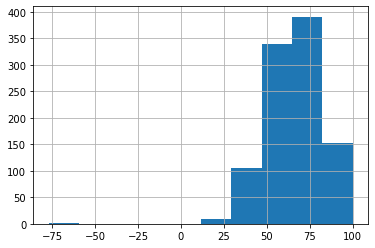

In [8]:
#проверим столбeц mathscore
print(df.mathscore.describe())
#построим график его распределения
df.mathscore.hist()

In [9]:
#видно, что минимальное значение -77, что некорректно, т.к. балл может быть только больше 0
#посчитаем количество срок с баллом по математике меньше нуля
print(df[df.mathscore<0].mathscore.count())

2


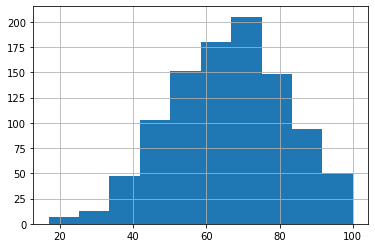

In [10]:
#строк с отрицательными значениями mathscore всего две, поэтому удалим строки, где значения меньше 0
df_new = df.loc[df.mathscore>=0]
df_new.mathscore.hist()

In [11]:
df_new.head()

,gender,race,parenteducation,lunch,testprepcourse,mathscore,readingscore,writingscore
0,female,group A,some high school,standard,completed,78,83,85
1,female,group C,some high school,standard,none,69,71,78
2,female,group B,bachelor's degree,free/reduced,completed,58,65,71
3,female,group C,some college,standard,none,69,72,70
4,female,group C,high school,standard,none,67,72,67


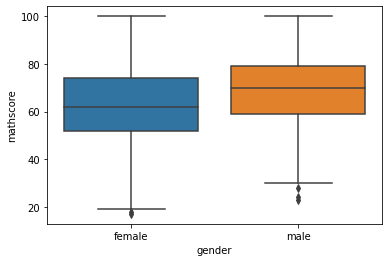

In [12]:
#построим boxplot, чтобы визуально оценить статистические различия
sns.boxplot( x = 'gender', y = 'mathscore', data = df_new)

In [13]:
#из анализа boxplot видно, что средний балл мальчиков выше чем девочек, а также наличие выбросов по нижней границе
#найдем выбросы
median = df_new.mathscore.median()
IQR = df_new.mathscore.quantile(0.75) - df_new.mathscore.quantile(0.25)
perc25 = df_new.mathscore.quantile(0.25)
perc75 = df_new.mathscore.quantile(0.75)
i1 = perc25 - 1.5*IQR
i2 = perc75 + 1.5*IQR
df_new[(df_new.mathscore<(perc25 - 1.5*IQR))].mathscore.count()

4

In [14]:
#т.к. выбросов всего 4 удалим их
df_new = df_new.loc[(df_new.mathscore>=(perc25 - 1.5*IQR))]

In [15]:
# проверим нормальность распределения mathscore, проведем тест Шапиро-Уилка
stat, p = shapiro(df_new.mathscore)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Распределение нормальное')
else:
    print('Распределение отличается от нормального')

Statistics=0.994, p-value=0.001
Распределение отличается от нормального


In [16]:
# для проверки гипотезы можно использовать z-test, даже при условии, что распределение отличается от нормального,
# так как выборка>30
stats, p = stests.ztest(df_new['mathscore'][df_new['gender'] == 'male'],
                              df_new['mathscore'][df_new['gender'] == 'female'])
print(float(stats), float(p))
if p < 0.05:
    print('Гипотеза не верна. Между средними оценками по математике для мальчиков и девочек есть статистические различия')
else:
    print('Гипотеза верна. Между средними оценками по математике для мальчиков и девочек нет статистических различий')

6.055170544255324 1.4026897580568649e-09
Гипотеза не верна. Между средними оценками по математике для мальчиков и девочек есть статистические различия


In [17]:
# альтернативно проведем T-test Стьюдента
stats, p = ttest_ind(df_new['mathscore'][df_new['gender'] == 'male'],
                     df_new['mathscore'][df_new['gender'] == 'female'])
print(float(stats), float(p))
if p < 0.05:
    print('Гипотеза не верна. Между средними оценками по математике для мальчиков и девочек есть статистические различия')
else:
    print('Гипотеза верна. Между средними оценками по математике для мальчиков и девочек нет статистических различий')

6.055170544255324 1.9877460803407974e-09
Гипотеза не верна. Между средними оценками по математике для мальчиков и девочек есть статистические различия


#### Вывод: между средними оценками по математике для мальчиков и девочек есть статистические различия

### Задание 6

Вам предложены данные A/B теста. Проанализируйте, есть ли статистически значимая разница для конверсии в контрольной и экспериментальной группе.

Данные содержат 5 признаков:
    
* user_id - ID пользователя
* timestamp - Временная отметка
* group - К какой группе относится пользователь (контрольная или экспериментальная)
* landing_page - Какой дизайн показали пользователю {old_page, new_page}
* converted - Конверсия (0=not converted, 1=converted)

Не забудьте проверить и подготовить данные, сделать всю необходимую предобработку.

In [18]:
dfab = pd.read_csv('ab_data.csv')

dfab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [19]:
dfab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [20]:
#проверим значения столбца group
dfab.group.value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [21]:
#проверим значения столбца landing_page
dfab.landing_page.value_counts()

new_page    147239
old_page    147239
Name: landing_page, dtype: int64

In [22]:
#проверим значения столбца converted
dfab.converted.value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [23]:
#посмотрим число уникальных записей user_id
dfab.user_id.nunique()

290584

In [24]:
#т.к. число user_id, которые встречаются больше 1 раза незначительно, удалим такие записи
drop_users = dfab['user_id'].value_counts()[(dfab['user_id'].value_counts()>1)].index
dfab = dfab[~dfab['user_id'].isin(drop_users)]
dfab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286690 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       286690 non-null  int64 
 1   timestamp     286690 non-null  object
 2   group         286690 non-null  object
 3   landing_page  286690 non-null  object
 4   converted     286690 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.1+ MB


(0.0, 0.15)

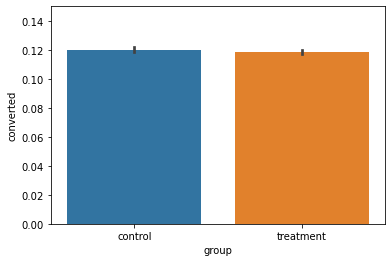

In [25]:
#данные выглядят чистыми, построим barplot для их визуализации
plt.figure(figsize=(6,4))
sns.barplot( x = 'group', y = 'converted', data = dfab,)
plt.ylim(0,0.15)

In [26]:
#посчитаем уровень конверсии для обоих групп
control_group = dfab[dfab['group'] == 'control']['converted']
treatment_group = dfab[dfab['group'] == 'treatment']['converted']
print("Уровень конверсии в контрольной группе", round(control_group.sum()/control_group.count(),4)*100,'%')
print("Уровень конверсии в экспериментальной группе:", round(treatment_group.sum()/treatment_group.count(),4)*100,'%')

Уровень конверсии в контрольной группе 12.02 %
Уровень конверсии в экспериментальной группе: 11.87 %


In [27]:
# из графика видно что уровень конверии с обоих группах почти одинаковый, но чуть выше в контрольной группе.
# Проверим гипотезу об отсутствии статистически значимой разницы для конверсии в контрольной и экспериментальной группе.
# т.к. у нас достаточно большое кол-во данных логично использовать z-test
stats, p = stests.ztest(dfab['converted'][dfab['group'] == 'control'],
                        dfab['converted'][dfab['group'] == 'treatment'])
print(float(stats), float(p))
if p < 0.05:
    print("Гипотеза не верна. Есть статистически значимая разница для конверсии в контрольной и экспериментальной группе")
else:
    print("Гипотеза верна. Нет статистически значимой разницы для конверсии в контрольной и экспериментальной группе")

1.1944838871517816 0.23228873989686571
Гипотеза верна. Нет статистически значимой разницы для конверсии в контрольной и экспериментальной группе


#### Вывод: Нет статистически значимой разницы для конверсии в контрольной и экспериментальной группе